In [70]:
import os

import mne
import numpy as np
import matplotlib.pyplot as plt

In [71]:
%matplotlib inline

## `Raw` and `Epochs` objects in MNE

### Part 1 - Reading timeseries data from disk

Timeseries data in MNE is stored in [`mne.io.Raw`](https://mne.tools/stable/generated/mne.io.Raw.html) objects.<br>
`Raw` objects can be created through loading data from the disk via one of the various `mne.io.read_raw_xxx()` functions, or from an array directly.

To familiarise ourselves with `Raw` objects, we will start by loading one from one of MNE's example datasets.

In [72]:
# filepath to MNE'S example datasets on disk
sample_data_folder = mne.datasets.sample.data_path()

# load example data from disk
raw = mne.io.read_raw_fif(os.path.join(sample_data_folder, "MEG", "sample", "sample_audvis_raw.fif"))

Opening raw data file C:\Users\tsbin\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


`Raw` objects contain:
- the timeseries data
- the metadata, stored under the `info` attribute

In [73]:
raw.info

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


For example, here you can see that the data we have loaded contains a mixture of MEG and EEG data sampled at 600 Hz.

The data itself can be accessed via the [`get_data()`]([https](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.get_data)) method, which returns an array of shape `(channels, times)`.

In [74]:
data = raw.get_data()
print(data.shape)

(376, 166800)


`Raw` objects have various methods for working with timeseries data, such as:
- isolating specific channels - `pick()`, `drop_channels()`
- isolating specific windows of time - `crop()`
- filtering the data - `filter()`, `notch_filter()`
- plotting the data - `plot()`
- computing the power spectra of the data - `compute_psd()`

We will explore some of these methods below.

**Exercises - manipulating `Raw` objects**

We will start by selecting only a subset of channels to store in our `Raw` object, using the [`pick()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.pick) method.

`pick()` accepts channel names, channel types, or channel indices as input, and retains only those channels that match this criteria.

Below, we select only the MEG channels.

*Hint:* Generally in MNE, methods will modify the object in-place to save memory. Because we want to play around with the data without modifying the original object, we will first make a copy of the `Raw` object using the `copy()` method.

In [75]:
# Create a copy of the data so that we can mainpulate it
raw_copy = raw.copy()

# Select the MEG channels only
raw_copy.pick("meg")

# Verify that we have only MEG channels
print(raw_copy.get_data().shape)
raw_copy.info

(306, 166800)


Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers"
Bad channels,MEG 2443
EOG channels,Not available
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


As you can see, the new `Raw` object now has only 306 channels, corresponding to the 203 Gradiometers and 102 Magnetometers.

1a) Now select only the EEG channels from the original `Raw` object, and verify that only these channels remain.

In [76]:
# Remember to copy the original data
raw_copy = raw.copy()

## CODE GOES HERE
raw_copy.pick("eeg")
print(raw_copy.get_data().shape)
raw_copy.info

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


(60, 166800)


Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,59 EEG
Bad channels,EEG 053
EOG channels,Not available
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


1b) Now select the EEG and MEG channels simultaneously, and verify that only these channels remain.

In [77]:
# Remember to copy the original data
raw_copy = raw.copy()

## CODE GOES HERE
raw_copy.pick(["eeg", "meg"])
print(raw_copy.get_data().shape)
raw_copy.info

(366, 166800)


Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 59 EEG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,Not available
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


1c) Now select three channels of your choice by specifying their names, and verify that only these channels remain.

*Hint:* channel names are stored in the `ch_names` attribute of the `Raw` object.

In [78]:
raw_copy = raw.copy()

## CODE GOES HERE
raw_copy.pick(raw_copy.ch_names[:3])
print(raw_copy.get_data().shape)
print(raw_copy.ch_names)
raw_copy.info

(3, 166800)
['MEG 0113', 'MEG 0112', 'MEG 0111']


Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"2 Gradiometers, 1 Magnetometers"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


To proceed, we will select only the EEG data from the original `Raw` object.

Having isolated the EEG data, we can visualise it using the [`plot()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot) method.

Navigate through the different channels using the up and down arrow keys, and navigate through the timepoints using the left and right arrow keys.<br>
The home reduces the time window displayed, and the end key increases the time window displayed.

In [79]:
%matplotlib qt

# Select EEG data
raw_eeg = raw.copy().pick("eeg")

# Plot EEG data
raw_eeg.plot(scalings="auto");

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


Channels marked as bad:
['EEG 053']


We can also plot the locations of the EEG sensors using the [`plot_sensors()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot_sensors) method.

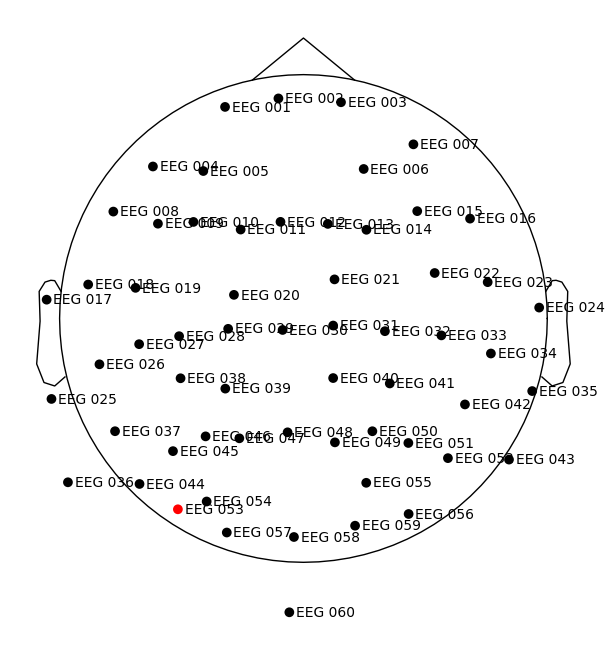

In [90]:
%matplotlib inline

# Plot EEG sensors
raw_eeg.plot_sensors(show_names=True);

%matplotlib qt

If you go to the end of the recording, you will see that is has a duration of ~280 seconds.

We can compute the exact time with the formula `duration (s) = number of timepoints / sampling frequency (Hz)`.

The number of timepoints in a `Raw` object can be easily accessed from the dunder method `__len__()`, and the sampling frequency can be accessed from the `info` attribute under the `"sfreq"` key.

In [28]:
print(f"{raw_eeg.__len__() / raw_eeg.info['sfreq'] :.0f} seconds of data")

278 seconds of data


Just like we were able to select only a specific set of channels, we can also select only a specific window of time using the [`crop()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.crop) method.

Below, we omit the first 10 seconds of the recording (as for `pick()`, this modifies the object in-place).

In [40]:
raw_eeg_copy = raw_eeg.copy()

# Units of time should be in seconds
raw_eeg_copy.crop(tmin=10, tmax=None)

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,59 EEG
Bad channels,EEG 053
EOG channels,Not available
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


1d) Verify that the duration of the recording has been reduced by 10 seconds by plotting the data or using the number of timepoints.

In [41]:
## CODE GOES HERE
print(f"{raw_eeg_copy.__len__() / raw_eeg_copy.info['sfreq'] :.0f} seconds of data")

268 seconds of data


1e) Now omit the last 10 seconds of the same object, and verify that the duration of the recording has been reduced by a further 10 seconds.

In [42]:
## CODE GOES HERE
duration = raw_eeg_copy.__len__() / raw_eeg_copy.info['sfreq']

raw_eeg_copy.crop(tmin=0, tmax=duration - 10)

print(f"{raw_eeg_copy.__len__() / raw_eeg_copy.info['sfreq'] :.0f} seconds of data")

258 seconds of data


1f) Now select only the time between 30 and 60 seconds, and verify that the duration of the recording is now 30 seconds.

In [43]:
## CODE GOES HERE
raw_eeg_copy.crop(tmin=30, tmax=60)

print(f"{raw_eeg_copy.__len__() / raw_eeg_copy.info['sfreq'] :.0f} seconds of data")

raw_eeg_copy.plot();

30 seconds of data


Channels marked as bad:
['EEG 053']


With this brief overview of `Raw` objects, we have seen how timeseries data can loaded and manipulated in MNE.

Generally, timeseries data is loaded from disk using one of the many `mne.read_raw_xxx()` functions tailored to specific data formats, like we have done above: https://mne.tools/stable/api/reading_raw_data.html.<br>
(see also the [MNE-BIDS](https://mne.tools/mne-bids/stable/index.html) package for loading data in the BIDS format)

However, it is sometimes also useful to create `Raw` objects from arrays directly, which we will explore below.

### Part 2 - Creating `Raw` objects from arrays

This requires first having some data to store!

Below we randomly generate some data consisting of 3 channels and 1,000 timepoints. Remember, MNE expects timeseries data to have shape `(channels, times)`.

In [45]:
n_channels = 3
n_times = 1000  # samples

np.random.seed(44)  # set seed for consistency

data = np.random.randn(n_channels, n_times)

If we want to store this data in a `Raw` object, we need to also specify the metadata, so that MNE can keep track of what the data represents.

This information is stored as an [`mne.Info`](https://mne.tools/stable/generated/mne.Info.html) object.<br>
We instantiate `Info` objects using the [`mne.create_info()`](https://mne.tools/stable/generated/mne.create_info.html) function.

For this, we need to specify:
- the names of the channels
- the types of the channels
- the sampling frequency

In [50]:
info = mne.create_info(ch_names=["CH_1", "CH_2", "CH_3"], ch_types="eeg", sfreq=100)

print(f"Channel names: {info["ch_names"]}")
info

Channel names: ['CH_1', 'CH_2', 'CH_3']


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,3 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,100.00 Hz
Highpass,0.00 Hz
Lowpass,50.00 Hz


As you can see, we have created an `Info` object for 3 EEG channels. We arbitrarily set the sampling frequency to 100 Hz.

**Exercises - creating `Raw` from arrays**

We can also specify the types of each channel separately using the `ch_types` argument.

2a) Create an `Info` object for 3 EEG channels, specifying the type of each channel separately.

In [56]:
## CODE GOES HERE
info = mne.create_info(ch_names=["CH_1", "CH_2", "CH_3"], ch_types=["eeg", "eeg", "eeg"], sfreq=100)

info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,3 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,100.00 Hz
Highpass,0.00 Hz
Lowpass,50.00 Hz


2b) Create an `Info` object for 3 channels, where the first is EEG, the second a gradiometer, and the third a magnetometer.

In [57]:
## CODE GOES HERE
info = mne.create_info(ch_names=["CH_1", "CH_2", "CH_3"], ch_types=["eeg", "grad", "mag"], sfreq=100)

info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"1 EEG, 1 Gradiometers, 1 Magnetometers"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,100.00 Hz
Highpass,0.00 Hz
Lowpass,50.00 Hz


As you may have noticed, specific bits of information can be accessed from the `Info` object in the same way you would access information from a dictionary.

2c) Get the sampling frequency from the `Info` object.

In [65]:
## CODE GOES HERE
info["sfreq"]

100.0

2d) Get the channel names from the `Info` object.

In [66]:
## CODE GOES HERE
info["ch_names"]

['CH_1', 'CH_2', 'CH_3']

Using an info object where all 3 channels are EEG, we can now create a `Raw` object.

When doing so from an array directly, we have to use the [`mne.io.RawArray()`](https://mne.tools/stable/generated/mne.io.RawArray.html) class.

In [63]:
info = mne.create_info(ch_names=["CH_1", "CH_2", "CH_3"], ch_types="eeg", sfreq=100)

raw = mne.io.RawArray(data=data, info=info)

raw.info

Creating RawArray with float64 data, n_channels=3, n_times=1000
    Range : 0 ... 999 =      0.000 ...     9.990 secs
Ready.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,3 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,100.00 Hz
Highpass,0.00 Hz
Lowpass,50.00 Hz


Although the `RawArray` object is of a different class to the `Raw` object we were working with before, we can still use the same methods.

For example, here we again use `plot()` to visualise the data.

In [64]:
raw.plot(scalings="auto");

Channels marked as bad:
none


The `Info` object we created is now stored under the `info` attribute of the `Raw` object.

2e) Get the sampling frequency from `info` attribute of the `Raw` object.

In [67]:
## CODE GOES HERE
raw.info["sfreq"]

100.0

2f) Get the channel names from the `info` attribute of the `Raw` object.

In [68]:
## CODE GOES HERE
raw.info["ch_names"]

['CH_1', 'CH_2', 'CH_3']

### Part 3 - Epoching timeseries data

For many analyses, it is useful to divide the timeseries data into discrete chunks of time, called epochs.

Epochs can take the form of individuals trials (e.g. isolating data around a given stimulus or behaviour), or divide continuous resting-state data into discrete chunks.

Epochs are stored in MNE as [`mne.Epochs`](https://mne.tools/stable/generated/mne.Epochs.html) objects.

Here, we will reload the example dataset, isolating the EEG data and stimulus channels.

In [106]:
raw = mne.io.read_raw_fif(os.path.join(sample_data_folder, "MEG", "sample", "sample_audvis_raw.fif"))
raw.pick(["eeg", "stim"])
raw.info

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"9 Stimulus, 59 EEG"
Bad channels,EEG 053
EOG channels,Not available
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


Stimulus channels contain information about e.g. when stimuli were presented to subjects, when subjects performed an action, etc...

We can use the `plot()` method to visualise how stimulus data is stored in the `Raw` object.

In [108]:
raw.copy().pick("stim").plot();

The `mne.find_events()` function can be used to convert this information into discrete timepoints based on changes in the signal.

Events are stored as an array of shape `(events, 3)`, where:
- the first column is the timepoint of the event
- the second column is the previous type of the event 
- the third column is the new type of the event

An event ID of `0` corresponds to the absence of an event, and event IDs > `0` are stimuli/responses.

In [118]:
# Find the events from a given stimulus channel
events = mne.find_events(raw, stim_channel="STI 014")

# Print a subset of events
events[:5]

array([[27977,     0,     2],
       [28345,     0,     3],
       [28771,     0,     1],
       [29219,     0,     4],
       [29652,     0,     2]], dtype=int64)

Using these events, we can now create an `Epochs` object.

If we already have a `Raw` object, this is simply a case of passing the `Raw` object and the events array to the `Epochs` class.

Here, we create epochs for all events with an ID > `0`, taking the data from 1 second before to 1 second after each event using the `tmin` and `tmax` arguments.

In [126]:
epochs = mne.Epochs(raw=raw, events=events, tmin=-1, tmax=1)

epochs

Number of events,320
Events,1: 722: 733: 7332: 164: 715: 15
Time range,-1.001 – 1.001 s
Baseline,-1.001 – 0.000 s


As you can see:
-   this data has 320 events across all event types.
-   we have selected data in the [-1, +1] second window around each event.
-   each epoch was baseline-corrected using the time from the start of each epoch to the event itself.

Similarly to `Raw` objects, we can visualise the data stored in `Epochs` objects using the `plot()` method.

In [129]:
epochs.plot(scalings="auto", n_epochs=3);

**Exercises - creating epochs around events**

3a) Create epochs around all events in the window [-2, +2] seconds around the events.

In [149]:
## CODE GOES HERE
epochs = mne.Epochs(raw=raw, events=events, tmin=-2, tmax=2)
epochs

Number of events,320
Events,1: 722: 733: 7332: 164: 715: 15
Time range,-2.000 – 2.000 s
Baseline,-2.000 – 0.000 s


3b) Create epochs around all events in the window [-1, +3] seconds around the events.

In [148]:
## CODE GOES HERE
epochs = mne.Epochs(raw=raw, events=events, tmin=-1, tmax=3)
epochs

Number of events,320
Events,1: 722: 733: 7332: 164: 715: 15
Time range,-1.001 – 3.000 s
Baseline,-1.001 – 0.000 s


3c) Create epochs around all events in the window [-0.5, +0.5] seconds around the events.

In [147]:
## CODE GOES HERE
epochs = mne.Epochs(raw=raw, events=events, tmin=-0.5, tmax=0.5)
epochs

Number of events,320
Events,1: 722: 733: 7332: 164: 715: 15
Time range,-0.499 – 0.499 s
Baseline,-0.499 – 0.000 s


Baseline-correction of epochs involves taking the mean of a given data period and subtracting this value from each data point of the whole epoch.

The `baseline` argument of `Epochs` is used to control which period is used for baseline correction.

The default when creating an `Epochs` object in MNE is to take the period from the start of the epoch to the event itself as the baseline period, specified as `baseline=(None, 0)`.

Like for `tmin` and `tmax`, the times in `baseline` are relative to the events.	

3d) Create epochs around all events in the window [-1, +1], but only use the window [-0.5, 0] seconds as a baseline.

In [146]:
## CODE GOES HERE
epochs = mne.Epochs(raw=raw, events=events, tmin=-1, tmax=1, baseline=(-0.5, 0))
epochs

Number of events,320
Events,1: 722: 733: 7332: 164: 715: 15
Time range,-1.001 – 1.001 s
Baseline,-0.500 – 0.000 s


3e) Create epochs around all events in the window [-1, +2], but only use the window [0, 2] seconds as a baseline.

In [145]:
## CODE GOES HERE
epochs = mne.Epochs(raw=raw, events=events, tmin=-1, tmax=2, baseline=(0, 2))
epochs = mne.Epochs(raw=raw, events=events, tmin=-1, tmax=2, baseline=(0, None))
epochs

Number of events,320
Events,1: 722: 733: 7332: 164: 715: 15
Time range,-1.001 – 2.000 s
Baseline,0.000 – 2.000 s


3f) Create epochs around all events in the window [-1, +2], and use this whole period as a baseline.

In [144]:
## CODE GOES HERE
epochs = mne.Epochs(raw=raw, events=events, tmin=-1, tmax=2, baseline=(-1, 2))
epochs = mne.Epochs(raw=raw, events=events, tmin=-1, tmax=2, baseline=(None, None))
epochs

Number of events,320
Events,1: 722: 733: 7332: 164: 715: 15
Time range,-1.001 – 2.000 s
Baseline,-1.001 – 2.000 s


Epochs for only particular event types can be specified using the `event_id` argument of `Epochs`.

3g) Create epochs around only the events with an ID of `1`.

In [141]:
## CODE GOES HERE
epochs = mne.Epochs(raw=raw, events=events, event_id=1)

Number of events,72
Events,1: 72
Time range,-0.200 – 0.499 s
Baseline,-0.200 – 0.000 s


3h) Create epochs around only the events with an ID of `2`.

In [142]:
## CODE GOES HERE
epochs = mne.Epochs(raw=raw, events=events, event_id=2)
epochs

Number of events,73
Events,2: 73
Time range,-0.200 – 0.499 s
Baseline,-0.200 – 0.000 s


3i) Create epochs around only the events with a IDs of `1`, `2`, and `3`.

In [143]:
## CODE GOES HERE
epochs = mne.Epochs(raw=raw, events=events, event_id=[1, 2, 3])
epochs

Number of events,218
Events,1: 722: 733: 73
Time range,-0.200 – 0.499 s
Baseline,-0.200 – 0.000 s
